# WGU Capstone Project: Credit Card Fraud Detection

In this project, the business problem we are solving is determining if a credit card transaction is fraudulent or legitimate. This problem is solved by applying machine learning that finds patterns within a sample data set to determine if future credit card transactions are legitimate.

# Import Libraries

In this section, fetching of necessary libraries are imported into the notebook.

Pandas will be used to read, parse, and store the data of the CSV file into a dataframe. Numpy will be used for data manipulation. Matplotlib will be used to generate graphs and charts from the data. Ipywidgets will be used to create widgets such as dropdown menus, sliders, and text boxes. Seaborn will be used to add style to the graphs; In this case darkgrid will be used. Sklearn will be used to provide the machine learning library necessary to accomplish this task.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from ipywidgets import HBox, VBox, Label
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, accuracy_score
plt.style.use('seaborn-darkgrid')

# Import CSV File

This fetches the CSV file named 'card_transaction_data.csv' and assigns it to a variable named sample_data.

In [2]:
sample_data = pd.read_csv('card_transaction_data.csv')


# Tableview of Sample Data

This will load all of the data contained within the CSV file and display it.

In [3]:
sample_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


# Condensed Tableview of Sample Data

This allows the user to view the first five rows contained within the CSV file.

In [4]:
sample_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Descriptive Methods

In this portion, the first three columns of the CSV file are selected. The describe() method is then applied to all to display an array of statistical data. 

In [46]:
sample_data_statistics = pd.DataFrame(sample_data[['distance_from_home', 'distance_from_last_transaction',
                                  'ratio_to_median_purchase_price']].describe())
sample_data_statistics.style.set_caption("Descriptive Statistics of Sample Data")

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182
std,65.390784,25.843093,2.799589
min,0.004874,0.000118,0.004399
25%,3.878008,0.296671,0.475673
50%,9.967760,0.998650,0.997717
75%,25.743985,3.355748,2.096370
max,10632.723672,11851.104565,267.802942


# Set Variables

Data from the CSV file are calculated and stored within a variable.

In [47]:
labels_ecommerce = 'Ecommerce Order', 'Not Ecommerce'
explode_ecommerce = (0, 0.1)
labels = 'Used Pin', 'Did Not Use Pin'
explode = (0, 0.1)
sizes_chip = [total_utilized_chip, total_no_chip, ]
sizes_pin = [count_used_pin, count_no_pin]

count_used_pin = sample_data[sample_data['used_pin_number'] == 1.0].count()['used_pin_number']
count_no_pin = sample_data[sample_data['used_pin_number'] == 0.0].count()['used_pin_number']

used_pin = {
    "Used Pin": count_used_pin,
    "Did Not Use Pin": count_no_pin
}

total_ecommerce = sample_data[sample_data['online_order'] == 1.0].count()['online_order']
total_not_ecommerce = sample_data[sample_data['online_order'] == 0.0].count()['online_order']

online_order = {
    "E-Commerce Order": total_ecommerce,
    "Not E-Commerce": total_not_ecommerce
}

total_no_chip = sample_data[sample_data['used_chip'] == 0.0].count()['used_chip']
total_utilized_chip = sample_data[sample_data['used_chip'] == 1.0].count()['used_chip']

used_chip = {
    "Utilized Chip": total_utilized_chip,
    "Did Not Utilize Chip": total_no_chip
}

total_non_repeat_retailer = sample_data[sample_data['repeat_retailer'] == 0.0].count()['repeat_retailer']
total_repeat_retailer = sample_data[sample_data['repeat_retailer'] == 1.0].count()['repeat_retailer']

repeat_retailer = {
    "Repeat": total_repeat_retailer,
    "Non-Repeat": total_non_repeat_retailer
}

# Data Visuals

The data from variable assignment are passed into graphs. The graphs are created with the data in mind. The first set are pie charts that display pin and chip usage. The pie chart offers an exploded view and a legend indicating color code. The second set are bar charts that display repeat retailers and e-commerce orders. The bar charts offer color coding to help differentiation of values. The final set are histogram charts that display transaction distance from home and transaction distance from previous transaction. 

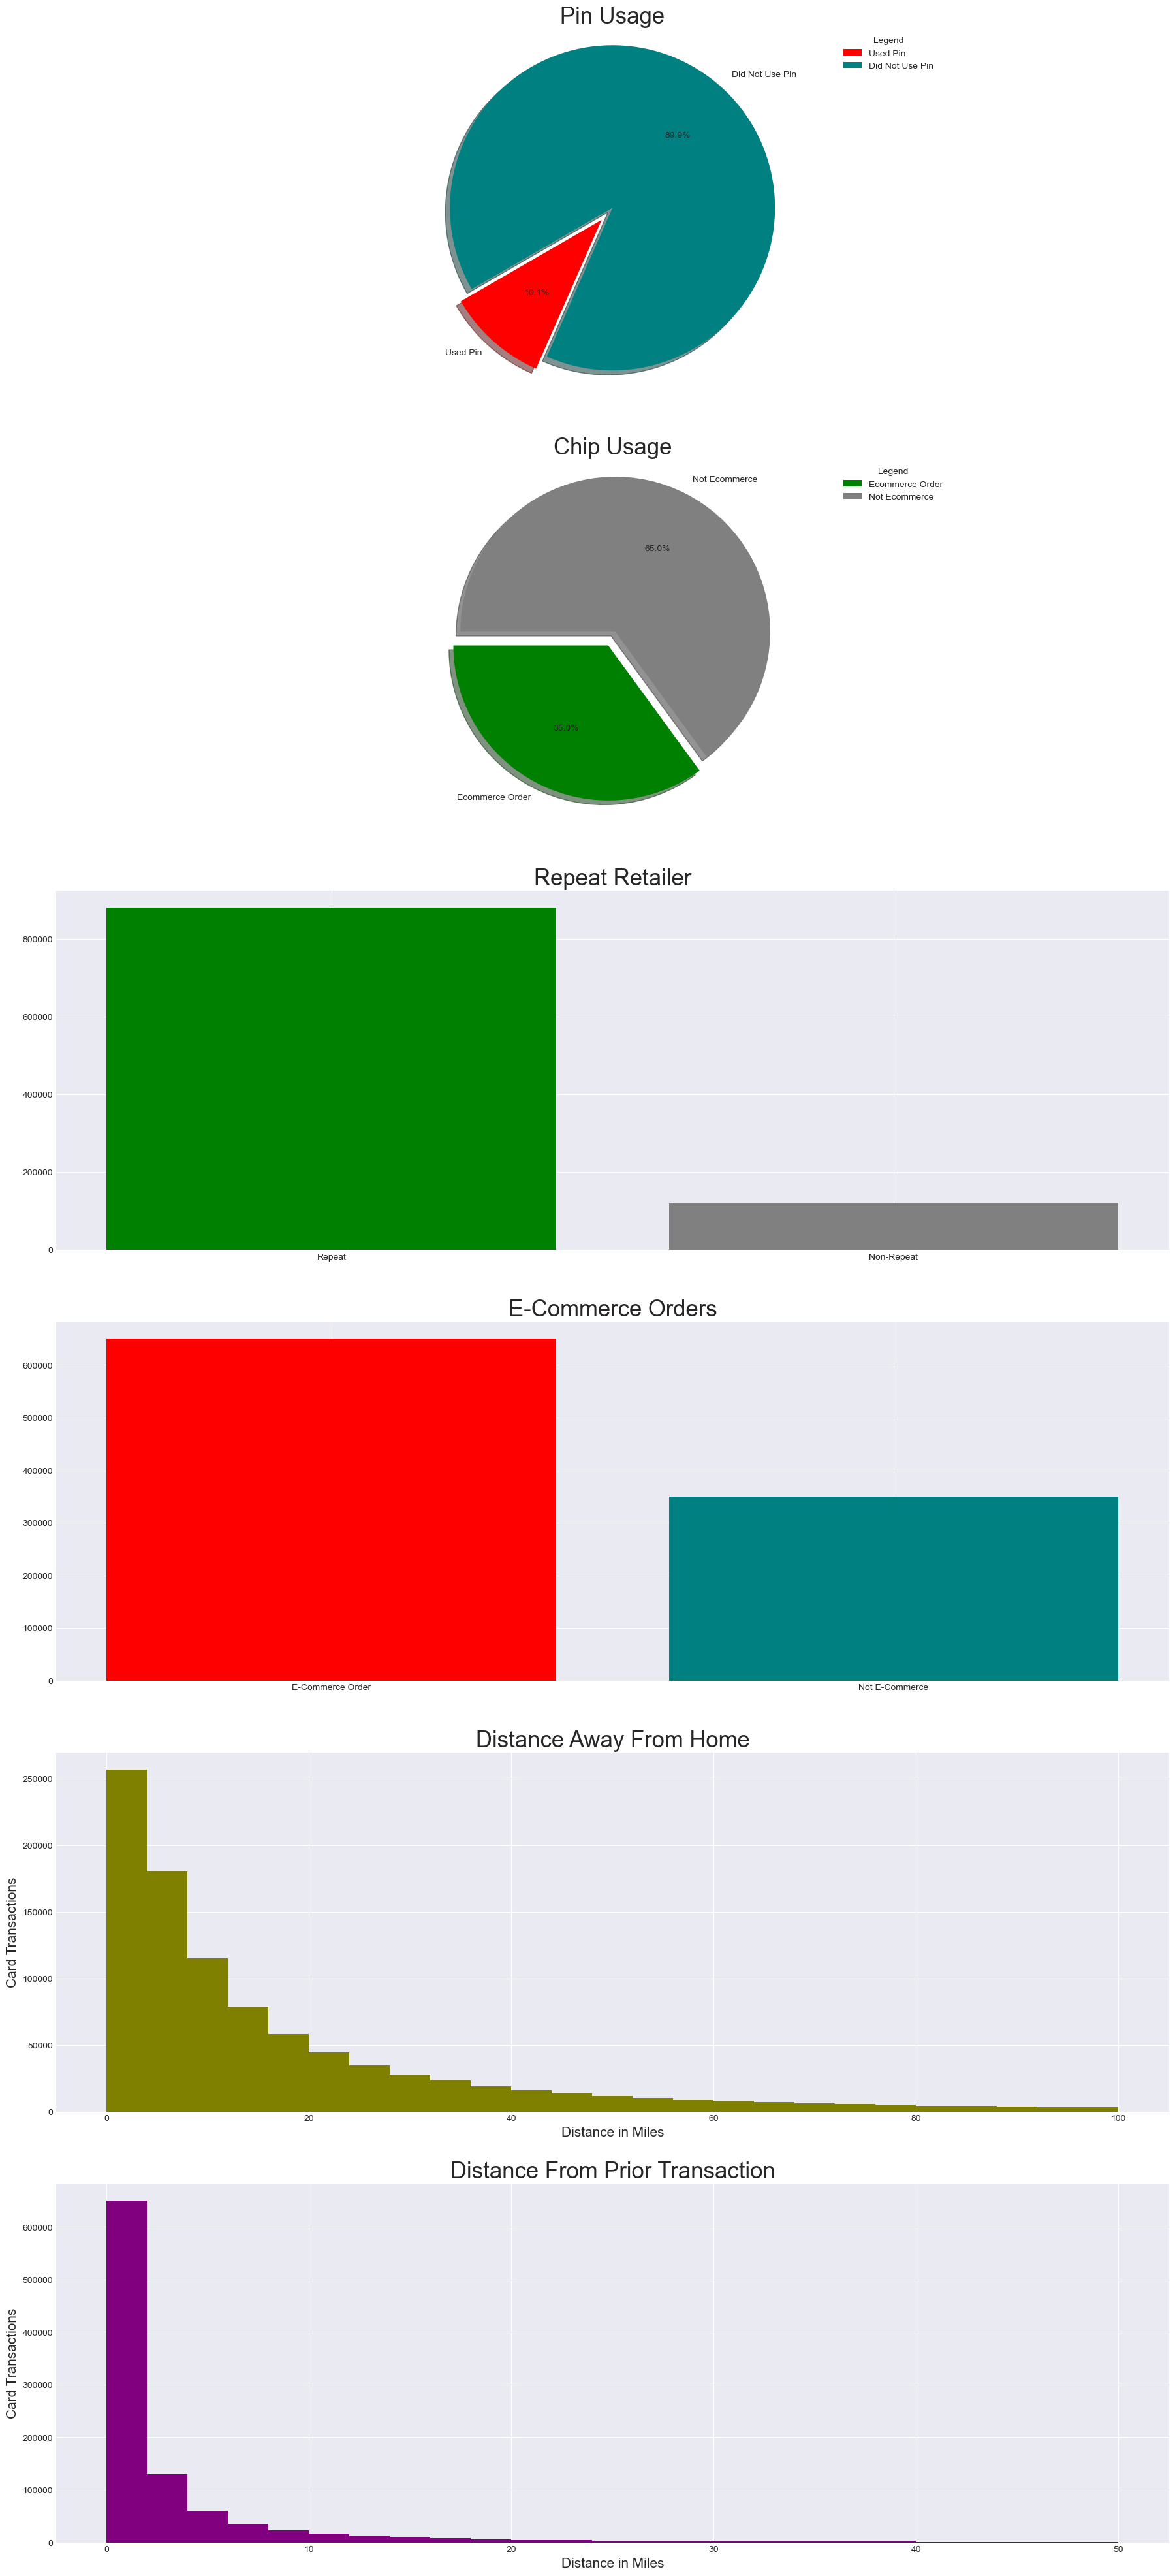

In [55]:
fig, (graph1, graph2, graph3, graph4, graph5, graph6) = plt.subplots(nrows=6, ncols=1, figsize=(22,50))

colors = ("red", "teal") 
colors2 = ("green", "grey") 

graph1.pie(sizes_pin, explode=explode, colors=colors, labels=labels, shadow=True, startangle=210, autopct='%1.1f%%')
graph1.axis('equal')
graph1.set_title("Pin Usage", fontsize=25)
graph1.legend(
          title ="Legend",
          loc="upper left",
          bbox_to_anchor =(0.7, 0, 0.5, 1))

graph2.pie(sizes_chip, explode=explode_ecommerce, colors=colors2, labels=labels_ecommerce, shadow=True, startangle=180, autopct='%1.1f%%')
graph2.axis('equal')
graph2.set_title("Chip Usage", fontsize=25)
graph2.legend(
          title ="Legend", 
          loc="upper left",
          bbox_to_anchor =(0.7, 0, 0.5, 1))

graph3.bar(repeat_retailer.keys(), repeat_retailer.values(), color=colors2)
graph3.set_title("Repeat Retailer", fontsize=25)

graph4.bar(online_order.keys(), online_order.values(), color=colors)
graph4.set_title("E-Commerce Orders", fontsize=25)

graph5.hist(sample_data['distance_from_home'], bins=25, range=(0,100), color='olive')
graph5.set_title("Distance Away From Home", fontsize=25)
graph5.set_xlabel('Distance in Miles', fontsize=15) 
graph5.set_ylabel('Card Transactions', fontsize=15)

graph6.hist(sample_data['distance_from_last_transaction'], bins=25, range=(0,50), color='purple')
graph6.set_title("Distance From Prior Transaction", fontsize=25)
graph6.set_xlabel('Distance in Miles', fontsize=15) 
graph6.set_ylabel('Card Transactions', fontsize=15)

plt.show()

# Create Test/Train Data

In this supervised machine learning modell, the numpy random seed provides an input to the pseudo-random number generator. X is assigned all sample data besides the fraud column. y is assigned to all data within the fraud column. The train data is used to 'fit' the model. The test data is used for an unbiased evaluation of the final model. X is assigned the first sequence where y is assigned the second sequence. The train_size defines the size of the training set and can be between 0.0 and 1.0.

In [8]:
np.random.seed(99)

X = sample_data.drop('fraud', axis=1)

y = sample_data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

# Train the Model

In this section, the classifier is defined and 'fit' on the training data. A training score, confusion matrix, and classification report are generated.

In [9]:
model=SGDClassifier(loss="hinge", max_iter=10000)

model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print("Training score: ", score) 

y_preds = model.predict(X_test)

Training score:  0.962282
[[448968   7069]
 [ 11964  31999]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98    456037
         1.0       0.82      0.73      0.77     43963

    accuracy                           0.96    500000
   macro avg       0.90      0.86      0.88    500000
weighted avg       0.96      0.96      0.96    500000



# Model Performance

In this section, the accuracy and mean error rate are displayed to show the efficency of the model. 

In [13]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

cr = classification_report(y_test, y_preds)
print(cr)

print(f"Accuracy Score: {accuracy_score(y_test, y_preds)}, Mean Error: {mean_absolute_error(y_test, y_preds)}")

[[448968   7069]
 [ 11964  31999]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98    456037
         1.0       0.82      0.73      0.77     43963

    accuracy                           0.96    500000
   macro avg       0.90      0.86      0.88    500000
weighted avg       0.96      0.96      0.96    500000

Accuracy Score: 0.961934, Mean Error: 0.038066


# Creation of User Input Widgets

In this section, interactive widgets are created. Three sliders and four drop down menus are produced from this code to allow the user to input data into the system. The drop down menus are assigned 0.0 or 1.0 depending on if the user selects yes or no.

In [49]:
distance_from_home_slider = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=250.0,
    steo=0.5,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

distance_from_last_transact_slider = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=250.0,
    steo=0.5,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

ratio_to_median_purchase_price_slider = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=275.0,
    steo=0.1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

repeat_retailer_selector = widgets.Dropdown(
    options=[('', 0.5), ('Yes', 1.0), ('No', 0.0)],
    value=0.5,
    disabled=False,
)

utilized_chip_selector = widgets.Dropdown(
  options=[('', 0.5), ('Yes', 1.0), ('No', 0.0)],
    value=0.5,
    disabled=False,
)

utilized_pin_selector = widgets.Dropdown(
  options=[('', 0.5), ('Yes', 1.0), ('No', 0.0)],
    value=0.5,
    disabled=False,
)

ecommerce_selector = widgets.Dropdown(
    options=[('', 0.5), ('Yes', 1.0), ('No', 0.0)],
    value=0.5,
    disabled=False,
)

# Assigning Widgets

The aforementioned widgets are given a label and assigned to a horizontal box within a parent vertical box.

In [50]:
box1 = HBox([
    Label('Distance From Home (MI):'),
    distance_from_home_slider
])

box2 = HBox([
    Label('Distance From Last Transaction (MI):'),
    distance_from_last_transact_slider
])

box3 = HBox([
    Label('Ratio to Median Purchase Price:'),
    ratio_to_median_purchase_price_slider
])

box4 = HBox([
    Label('Was this a repeat retailer?'),
    repeat_retailer_selector
])

box5 = HBox([
    Label('Was the chip used?'),
    utilized_chip_selector
])

box6 = HBox([
    Label('Was the pin used?'),
    utilized_pin_selector
])

box7 = HBox([
    Label('Was this an e-commerce order?'),
    ecommerce_selector
])

VBox([box1, box2, box3, box4, box5, box6, box7,])

# User Input Data Processing

In this section, all values are obtained from the widgets. The model provided by the user is then tested. A method is created that defines if the user submitted model is fraudulent or legitimate.

In [20]:
feature_names = X.columns

distance_from_home = distance_from_home_slider.value
distance_from_last_transact = distance_from_last_transact_slider.value
ratio_to_median_purchase_price = ratio_to_median_purchase_price_slider.value
repeat_retailer = repeat_retailer_selector.value
utilized_chip = utilized_chip_selector.value
utilized_pin = utilized_pin_selector.value
ecommerce_order2 = ecommerce_selector.value

#Test Model
transact = pd.DataFrame(data=([[distance_from_home, distance_from_last_transact, ratio_to_median_purchase_price,
                                repeat_retailer, utilized_chip, utilized_pin, ecommerce_order2]]),
                        columns=feature_names)

#print
def run_model(dataframe):
    distance_from_home = distance_from_home_slider.value
    distance_from_last_transact = distance_from_last_transact_slider.value
    ratio_to_median_purchase_price = ratio_to_median_purchase_price_slider.value
    repeat_retailer = repeat_retailer_selector.value
    utilized_chip = utilized_chip_selector.value
    utilized_pin = utilized_pin_selector.value
    ecommerce_order2 = ecommerce_selector.value

    transact = pd.DataFrame(data=([[distance_from_home, distance_from_last_transact, ratio_to_median_purchase_price,
                                    repeat_retailer, utilized_chip, utilized_pin, ecommerce_order2]]),
                            columns=feature_names)
    result = model.predict(transact)
    if result[0] == 0.0:
        print("The transaction is legitimate!")
        print(f'{distance_from_home, distance_from_last_transact, ratio_to_median_purchase_price, repeat_retailer, utilized_chip, utilized_pin, ecommerce_order2}')

    else:
        print("The transaction is fraudulent!")
        print(f'{distance_from_home, distance_from_last_transact, ratio_to_median_purchase_price, repeat_retailer, utilized_chip, utilized_pin, ecommerce_order2}')


# Run User Data Against Model

In this section, the previously provided user data is ran against the algorithm. Upon the user clicking 'Run model', the system will output the results.

In [21]:
button = widgets.Button(
    description='Run Model',
    disabled=False,
    button_style='success',
    tooltip='Run Model',
    icon='check'
)

output = widgets.Output()

display(button, output)

def on_button_click(b):
    with output:
        run_model(transact)

button.on_click(on_button_click)

Button(button_style='success', description='Run Model', icon='check', style=ButtonStyle(), tooltip='Run Model'…

Output()